In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## preparing the data

In [2]:
# data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
# !wget $data -O data-week-3.csv 

In [3]:
df = pd.read_csv('data-week-3.csv')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

df = df.applymap(
    lambda x: x.lower().replace(' ', '_') if (isinstance(x, str)) else x
)

In [5]:
df['totalcharges']= pd.to_numeric(
    df.totalcharges, errors='coerce'
).fillna(0)

In [6]:
df['churn'] = (df.churn == 'yes').astype(int)

## setting the train-val-test dataset

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=1)

In [9]:
## define test size to be the 20% of the full df, you can do it by
# 20%/80% = 1/4
df_train, df_val = train_test_split(
    df_full_train, test_size=0.25, random_state=1
)

In [10]:
len(df_test), len(df_val), len(df_test)

(1409, 1409, 1409)

In [11]:
# avoid the random index
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [12]:
## get the rarget variable
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [13]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## EDA

In [14]:
df_full_train.reset_index(drop=True, inplace=True)

In [15]:
## verify for null values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [16]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [17]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [18]:
# 3 numerical variables and all the other categorical
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [19]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = [
    'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 
    'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
    'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 
    'contract', 'paperlessbilling', 'paymentmethod'
]

In [20]:
## how many options we have for each categoical?
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance: Difference and Risk Ratio

In [21]:
## see the churn rate for gender
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [22]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [23]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [24]:
## churn rate for partner 
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [25]:
## churn rate for partner 
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner
## higher rate for no partner than the golbal

0.3298090040927694

In [26]:
## risk ratio
print(churn_no_partner / global_churn)
print(churn_partner / global_churn)

1.2216593879412643
0.7594724924338315


In [27]:
## we can calculate difference and risk for all the categorical
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## Feature importance: Mutual information

In [28]:
from sklearn.metrics import mutual_info_score

In [29]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [30]:
## no much information
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [31]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [32]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)
# we got the importance of categorical variables

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature importance: correlation

In [33]:
## measure importance with numerical variables 
# tenure is permanency in months
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [34]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [35]:
df_full_train[
    (df_full_train.tenure > 2) & (df_full_train.tenure <= 12)
].churn.mean()

0.3994413407821229

In [36]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [37]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [38]:
df_full_train[
    (df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)
].churn.mean()

0.18340943683409436

In [39]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

## one-hot encoding

In [40]:
## working with categorical variables
from sklearn.feature_extraction import DictVectorizer

In [41]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [42]:
dv = DictVectorizer(sparse=False)

In [43]:
X_train = dv.fit_transform(train_dicts)

## also can use
# dv_fit(traiin_dicts)
# X_train = dv.transform(train_dicts)

In [44]:
## it identifies when the variables are numeric and do not transform it
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [45]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Logistic regression

In [46]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [47]:
z = np.linspace(-7, 7, 51)

In [48]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

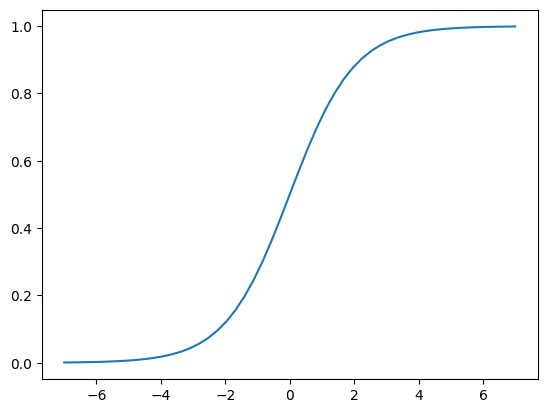

In [49]:
plt.plot(z, sigmoid(z))

## training a logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
model.intercept_[0] # tis is w0

-0.10903647727960432

In [53]:
model.coef_[0].round(3) #this is W

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [54]:
# hard prediction because already have the class, no the probabilities
model.predict(X_val) 

array([0, 0, 0, ..., 0, 1, 1])

In [55]:
## soft predictions, 2-d array get the prob to be 0 or 1
model.predict_proba(X_val) 

array([[0.99100325, 0.00899675],
       [0.79548609, 0.20451391],
       [0.78778599, 0.21221401],
       ...,
       [0.86361106, 0.13638894],
       [0.20023058, 0.79976942],
       [0.1625936 , 0.8374064 ]])

In [56]:
## for set up threshold we use predict proba
y_pred = model.predict_proba(X_val)[:, 1]

In [57]:
## setting up the trehshold
churn_decision = (y_pred >= 0.5)

In [58]:
## you can see the id for the customer hat could leave
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [59]:
## we can see how mane match
(y_val == churn_decision).mean()

0.8034066713981547

In [60]:
## how accurate the model is
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [61]:
## see what is happen
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [62]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [63]:
df_pred.correct.mean() ## you can explicity using .astype(int)

0.8034066713981547

## model interpretation

In [66]:
# review the coeficients and see what are those have more importance
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [69]:
small = ['contract', 'tenure', 'monthlycharges']

In [71]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [72]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [73]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [74]:
X_train_small = dv_small.transform(dicts_train_small)

In [75]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [76]:
w0 = model_small.intercept_[0]
w0

-2.476775660370065

In [77]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [78]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [82]:
#know using the model what is the probability
#negative indicates negative correlation, for this example y less that
#we hace churn from the person
-2.47 + 0.97 + (50 * 0.027) + (5 * -0.036)

-0.3300000000000001

In [83]:
## underscore (_) use the past output and use it (magicword)
sigmoid(_)

0.41824062315816374

## using the model

In [84]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(
    orient='records'
)

In [85]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [86]:
y_full_train = df_full_train.churn.values

In [87]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [88]:
dicst_test = df_test[categorical + numerical].to_dict(orient='records')

In [89]:
X_test = dv.transform(dicst_test)

In [90]:
y_pred = model.predict_proba(X_test)[:, 1]

In [91]:
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

0.815471965933286

In [95]:
# using the model for one customer
customer = dicst_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [97]:
X_small = dv.transform([customer])

In [104]:
model.predict_proba(X_small)[0, 1] ## get the probability for churn (or be 1)

0.4056810977888851

In [105]:
y_test[10]

0

In [107]:
# using the model for one customer
customer = dicst_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [108]:
X_small = dv.transform([customer])

In [112]:
model.predict_proba(X_small)[0, 1] ## get the probability for churn (or be 1)

0.5968852088284007

In [113]:
y_test[-1]

1